# Deep Neural Networks

* Only a single hidden layer is needed to learn any mapping (although the size of the middle layer may need to be very, very big)
* Neural networks were a very active area of research in the 1970s and 1980s
* Later these networks were no longer used, particularly compared to other classification algorithms such as support vector machines
    - The computational power needed to run many neural networks was more than other algorithms and more than what many people had access to
    - While the back propagation algorithm has issues with larger networks, requiring a very large amount of training before the weights settle
* Each of these issues has been addressed in recent times, leading to a resurgence
in popularity of neural networks

## ANN vs DNN

* The aspect that differentiates deep neural networks from the more basic neural networks is size
* A neural network is considered deep when it has two or more hidden layers
* In practice, a deep neural network is often much larger, both in the number of nodes in each layer and also the number of layers
* While some of the research of the mid-2000s focused on very large numbers of layers, smarter algorithms are reducing the actual number of layers needed

## Representation Learning

* A neural network takes very basic features as inputs - in the case of computer vision, it is simple pixel values
* That data is combined and pushed through the network
    - these basic features combine into more complex features.
    - these features may have little meaning to humans, but they represent the aspects of the sample that the computer looks for to make its classification

# CIFAR-10

![CIFAR-10](cifar10.png)

* It contains 60,000 images that are 32 pixels wide and 32 pixels high
* Each pixel has a red-green-blue (RGB) value
* The dataset is already split into training and testing
* There is a python version, where data has already been converted to NumPy arrays
* http://www.cs.toronto.edu/~kriz/cifar.html

# Loading Data

In [1]:
import os
data_folder = os.path.join(os.path.expanduser("~"), 
                         "Github/public/bdap2015/ML103/Part-Time-Batch1/data", "cifar-10-batches-py")
batch1_filename = os.path.join(data_folder, "data_batch_1")

* The batches have been saved using pickle, which is a python library to save objects
* These objects were saved using Python2
* Python2
    - call *pickle.load* on the file to get the object
* Python3
    - we set the encoding to latin while loading (even though we are opening it in byte mode)
    - http://stackoverflow.com/questions/11305790/pickle-incompatability-of-numpy-arrays-between-python-2-and-3

In [4]:
import pickle

def unpickle(filename):
    with open(filename, 'rb') as fo:
        return pickle.load(fo, encoding='latin1')

batch1 = unpickle(batch1_filename)

In [6]:
batch1

{'batch_label': 'training batch 1 of 5',
 'data': array([[ 59,  43,  50, ..., 140,  84,  72],
        [154, 126, 105, ..., 139, 142, 144],
        [255, 253, 253, ...,  83,  83,  84],
        ..., 
        [ 71,  60,  74, ...,  68,  69,  68],
        [250, 254, 211, ..., 215, 255, 254],
        [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8),
 'filenames': ['leptodactylus_pentadactylus_s_000004.png',
  'camion_s_000148.png',
  'tipper_truck_s_001250.png',
  'american_elk_s_001521.png',
  'station_wagon_s_000293.png',
  'coupe_s_001735.png',
  'cassowary_s_001300.png',
  'cow_pony_s_001168.png',
  'sea_boat_s_001584.png',
  'tabby_s_001355.png',
  'muntjac_s_001000.png',
  'arabian_s_001354.png',
  'quarter_horse_s_000672.png',
  'passerine_s_000343.png',
  'camion_s_001895.png',
  'trailer_truck_s_000335.png',
  'dumper_s_000821.png',
  'alley_cat_s_000200.png',
  'accentor_s_000677.png',
  'frog_s_001671.png',
  'capreolus_capreolus_s_000051.png',
  'tomcat_s_000772.png',
  'picker

* This batch is a dictionary, containing 
    - the actual data in NumPy arrays, 
    - the corresponding labels and filenames, and
    - finally a note to say which batch it is (this is training batch 1 of 5)
* We can extract an image by using its index in the batch's data key

In [8]:
image_index = 100
image = batch1['data'][image_index]

In [9]:
image

array([213, 211, 211, ..., 203, 213, 226], dtype=uint8)

* The image array is a NumPy array with 3,072 entries, from 0 to 255
* Each value is the red, green, or blue intensity at a specific location in the image

## Displaying the Image

* The images are in a different format than what images (matplotlib) use (to display images)
* We first need to reshape the array and rotate the matrix
* This doesn't matter to our neural network, but we do need to convert it for display

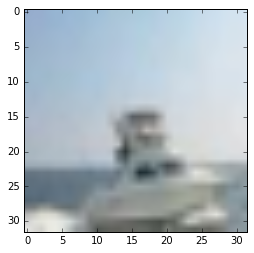

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

image = image.reshape((32,32, 3), order='F')
image = np.rot90(image, -1)
plt.imshow(image)

## Short note on Libraries

* Objects and Matrices
* Tensors

--
* Pybrain
* Theano
* Tensorflow
* Lasagne
* nolearn
* keras

--
* Torch
* Caffe
* neongpu

## Theano

* Theano is a library that allows you to build mathematical expressions and run them.
* In Theano, we define the function we want to perform, not the way in which it is computed.
* This allows Theano to optimize the evaluation of the expression and also to perform lazy computation - expressions are only actually computed when they are needed, not when they are defined

        pip install Theano
        pip3 install Theano

In [17]:
import theano
from theano import tensor as T

AttributeError: module 'theano' has no attribute 'gof'

First, we define the two inputs, a and b. These are simple numerical values, so we define them as scalars

In [ ]:
a = T.dscalar()
b = T.dscalar()

Then, we define the output, c. This is an expression based on the values of a and b:

In [ ]:
c = T.sqrt(a ** 2 + b ** 2)

* Note that c isn't a function or a value here - it is simply an expression, given a and b.
* Also a and b don't have actual values - this is an algebraic expression, not an absolute one. 
* In order to compute on this, we define a function:

In [ ]:
f = theano.function([a,b], c)

This tells Theano to create a function that takes values for a and b as inputs, and returns c as an output, computed on the values given

In [ ]:
f(3, 4)

## Lasagne

Why Lasagne?

Lasagne implements a number of modern types of neural network layers, and the building blocks for building them.

* Network-in-network layers: These are small neural networks that are easier to interpret than traditional neural network layers
* Dropout layers: These randomly drop units during training, preventing overfitting, which is a major problem in neural networks
* Noise layers: These introduce noise into the neurons; again, addressing the overfitting problem

# Convolution Layers

* Convolution layers are organized to mimic the way in which human vision works
* They use small collections of connected neurons that analyze only a segment of the input values (in this case, an image)
* This allows the network to deal with standard alterations such as dealing with translations of images
    - In the case of vision-based experiments, an example of an alteration dealt with by convolution layers is translating the image
* In contrast, a traditional neural network is often heavily connected—all neurons from one layer connect to all neurons in the next layer
* Convolutional networks are implemented in
    - lasagne.layers.Conv1DLayer
    - lasagne.layers.Conv2DLayer

## Pooling Layers

* Neural networks often use together convolutional layers (generally, just Convolutional Neural Networks) and also the pooling layers, which take the maximum output for a certain region
* This reduces noise caused by small variations in the image, and reduces (or down-samples) the amount of information
* This has the added benefit of reducing the amount of work needed to be done in later layers
* Lasagne implements these pooling layers in the 
    - lasagne.layers.MaxPool2DLayer class
* Together with the convolution layers, we have all the tools needed to build a convolution neural network

## Iris

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data.astype(np.float32)
y_true = iris.target.astype(np.int32)

* Due to the way Lasagne works, we need to be a bit more explicit about the data types
* This is why we converted the classes to int32 (they are stored as int64 in the original dataset)

In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_true, random_state=14)

* Next, we build our network by creating the different layers
* Our dataset contains
    - four input variables
    - three output classes
* This gives us the size of the first and last layer, but not the layers in between
* Playing around with this figure will give different results, and it is worth trailing different values to see what happens

--

* We start by creating an input layer, which has the same number of nodes as the dataset
* We can specify a batch size (where the value is 10), which allows Lasagne to do some optimizations in training

In [ ]:
import lasagne
input_layer = lasagne.layers.InputLayer(shape=(10, X.shape[1]))

* Next, we create our hidden layer
* This layer takes its input from our input layer (specified as the first argument), which has 12 nodes, and uses the sigmoid nonlinearity

In [ ]:
hidden_layer = lasagne.layers.DenseLayer(input_layer, num_units=12, 
                                         nonlinearity=lasagne.nonlinearities.sigmoid)

* Next, we have our output layer that takes its input from the hidden layer
* It has three nodes (which is the same as the number of classes)
* It uses the softmax nonlinearity
* Softmax is more typically used in the final layer of neural networks

In [ ]:
output_layer = lasagne.layers.DenseLayer(hidden_layer, num_units=3,
                                         nonlinearity=lasagne.nonlinearities.softmax)

* In Lasagne's usage, this output layer is our network
* When we enter a sample into it, it looks at this output layer and obtains the layer that is inputted into it (the first argument)
* This continues recursively until we reach an input layer, which applies the samples to itself, as it doesn't have an input layer to it
* The activations of the neurons in the input layer are then fed into its calling layer (in our case, the hidden_layer), and that is then propagated up all the way to the output layer

* In order to train our network, we now need to define some training functions, which are Theano-based functions
* In order to do this, we need to define a Theano expression and a function for the training
* We start by creating variables for the input samples, the output given by the network, and the actual output

In [ ]:
import theano.tensor as T
net_input = T.matrix('net_input')
net_output = output_layer.get_output(net_input)
true_output = T.ivector('true_output')

* We can now define our loss function, which tells the training function how to improve
the network
* It attempts to train the network to minimize the loss according to this function
* The loss we will use is the categorical cross entropy, a metric on categorical data such as ours
* This is a function of the output given by the network and the actual output we expected

In [ ]:
loss = T.mean(T.nnet.categorical_crossentropy(net_output, true_output))

* Next, we define the function that will change the weights in our network
* In order to do this, we obtain all of the parameters from the network and create a function (using a helper function given by Lasagne) that adjusts the weights to minimize our loss

In [ ]:
all_params = lasagne.layers.get_all_params(output_layer)
updates = lasagne.updates.sgd(loss, all_params, learning_rate=0.1)

Finally, we create Theano-based functions that perform this training and also obtain the output of the network for testing

In [18]:
import theano
train = theano.function([net_input, true_output], loss, updates=updates)
get_output = theano.function([net_input], net_output)

AttributeError: module 'theano' has no attribute 'gof'

* We can then call our train function, on our training data, to perform one iteration of training the network
* This involves taking each sample, computing the predicted class of it, comparing those predictions to the expected classes, and updating the weights to minimize the loss function
* We then perform this 1,000 times, incrementally training our network over those iterations

In [19]:
for n in range(1000):
    train(X_train, y_train)

NameError: name 'train' is not defined

In [ ]:
y_output = get_output(X_test)

* Note that get_output is a Theano function we obtained from our neural network, which is why we didn't need to add our network as a parameter to this line of code

* y_pred is an array of class predictions, like we are used to in classification tasks

In [ ]:
import numpy as np
y_pred = np.argmax(y_output, axis=1)

* We can now compute the F-score using these predictions

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

# nolearn

* The nolearn package provides wrappers for Lasagne
* We lose some of the fine-tuning that can go with building a neural network by hand in Lasagne, but the code is much more readable and much easier to manage
* The nolearn package implements the normal sorts of complex neural networks you are likely to want to build
* If you want more control than nolearn gives you, you can revert to using Lasagne, but at the cost of having to manage a bit more of the training and building process

In [24]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from skimage.transform import resize
from skimage import transform as tf
from skimage.measure import label, regionprops
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split

def create_captcha(text, shear=0, size=(100, 24)):
    im = Image.new("L", size, "black")
    draw = ImageDraw.Draw(im)
    font = ImageFont.truetype(r"./bretan/Coval-Black.otf", 22)
    draw.text((2, 2), text, fill=1, font=font)
    image = np.array(im)
    affine_tf = tf.AffineTransform(shear=shear)
    image = tf.warp(image, affine_tf)
    return image / image.max()

def segment_image(image):
    labeled_image = label(image > 0)
    subimages = []
    for region in regionprops(labeled_image):
        start_x, start_y, end_x, end_y = region.bbox
        subimages.append(image[start_x:end_x,start_y:end_y])
    if len(subimages) == 0:
        return [image,]
    return subimages

random_state = check_random_state(14)
letters = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
shear_values = np.arange(0, 0.5, 0.05)

def generate_sample(random_state=None):
    random_state = check_random_state(random_state)
    letter = random_state.choice(letters)
    shear = random_state.choice(shear_values)
    return create_captcha(letter, shear=shear, size=(20, 20)), letters.index(letter)

dataset, targets = zip(*(generate_sample(random_state) for i in range(3000)))
dataset = np.array(dataset, dtype='float')
targets = np.array(targets)
onehot = OneHotEncoder()
y = onehot.fit_transform(targets.reshape(targets.shape[0],1))
y = y.todense().astype(np.float32)
dataset = np.array([resize(segment_image(sample)[0], (20, 20)) for sample in dataset])
X = dataset.reshape((dataset.shape[0], dataset.shape[1] * dataset.shape[2]))
X = X / X.max()
X = X.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=14)

* A neural network is a collection of layers. Implementing one in nolearn is a case of organizing what those layers will look like

In [30]:
X

array([[ 0.07779165,  0.12245788,  0.16776568, ...,  0.54209256,
         0.35576659,  0.21642956],
       [ 0.13406874,  0.32588717,  0.46347201, ...,  0.40838704,
         0.55258507,  0.65875   ],
       [ 0.00567401,  0.04190454,  0.08061854, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.63937497,  0.77499998,  0.77499998, ...,  0.096875  ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.17398253,
         0.47633719,  0.65875   ],
       [ 0.34781945,  0.58532411,  0.76628309, ...,  0.08980853,
         0.        ,  0.        ]], dtype=float32)

In [31]:
from lasagne import layers
layers=[
 ('input', layers.InputLayer),
 ('hidden', layers.DenseLayer),
 ('output', layers.DenseLayer),
 ]

ImportError: No module named 'lasagne'

In [32]:
from lasagne import updates
from nolearn.lasagne import NeuralNet
from lasagne.nonlinearities import sigmoid, softmax

ImportError: No module named 'lasagne'

In [ ]:
net1 = NeuralNet(layers=layers,
                 input_shape=X.shape,
                 hidden_num_units=100,
                 output_num_units=26,
                 hidden_nonlinearity=sigmoid,
                 output_nonlinearity=softmax,
                 hidden_b=np.zeros((100,), dtype=np.float32),
                 update=updates.momentum,
                 update_learning_rate=0.9,
                 update_momentum=0.1,
                 regression=True,
                 max_epochs=1000,)

net1.fit(X_train, y_train)

In [ ]:
y_pred = net1.predict(X_test)
y_pred = y_pred.argmax(axis=1)
assert len(y_pred) == len(X_test)
if len(y_test.shape) > 1:
    y_test = y_test.argmax(axis=1)
print(f1_score(y_test, y_pred))